In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [3]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [4]:
def get_soup(url):
    
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:

reviewlist = []


def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
reviewlist = []


def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [7]:
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
   
    get_reviews(soup)
   
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\kkdk0001\AppData\Local\Temp/ipykernel_1812/3917192485.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [8]:
df = pd.DataFrame(reviewlist)
df

Rating                                              Title  \
0        4.0                                               Good   
1        4.0                                                 Ok   
2        4.0                                        Good enough   
3        4.0  It's nice compared to other phones at this range.   
4        4.0                          It's a good Android phone   
...      ...                                                ...   
4995     1.0           Big Disappointment form OnePlus & Amazon   
4996     1.0                            performance is too poor   
4997     1.0                             Want to return product   
4998     1.0                       Worst and low camera quality   
4999     1.0                                   Sound and camera   

                                                 Review  \
0     All items are there in the box. but I didn't s...   
1                                                 Supar   
2     Battery life is good and I liked high speed ch...   
3     The dislike part is that sometimes the volume ...   
4                                    Good Android phone   
...                                                 ...   
4995  Green line on display with in few days of use ...   
4996  Camara perfomance is not so good and speaker p...   
4997  It's a used product......I want to return my p...   
4998  Worst camera quality, it's look like a low pho...   
4999  This product is not good, sound and camera is ...   

                                    Review_Date  
0     Reviewed in India 🇮🇳 on 23 September 2022  
1     Reviewed in India 🇮🇳 on 23 September 2022  
2     Reviewed in India 🇮🇳 on 22 September 2022  
3     Reviewed in India 🇮🇳 on 20 September 2022  
4     Reviewed in India 🇮🇳 on 21 September 2022  
...                                         ...  
4995                              28 April 2022  
4996                                7 June 2022  
4997                                17 May 2022  
4998                               5 April 2022  
4999                              27 April 2022  

[5000 rows x 4 columns]

In [11]:
df.to_csv("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text MiningAmazon_Reviews_Oneplus_Nord_CE2.csv")

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [17]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data] 

In [19]:
%matplotlib inline

In [22]:
reviews=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text MiningAmazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                              Title  \
0        4.0                                               Good   
1        4.0                                                 Ok   
2        4.0                                        Good enough   
3        4.0  It's nice compared to other phones at this range.   
4        4.0                          It's a good Android phone   
...      ...                                                ...   
4995     1.0           Big Disappointment form OnePlus & Amazon   
4996     1.0                            performance is too poor   
4997     1.0                             Want to return product   
4998     1.0                       Worst and low camera quality   
4999     1.0                                   Sound and camera   

                                                 Review  \
0     All items are there in the box. but I didn't s...   
1                                                 Supar   
2     Battery life is good and I liked high speed ch...   
3     The dislike part is that sometimes the volume ...   
4                                    Good Android phone   
...                                                 ...   
4995  Green line on display with in few days of use ...   
4996  Camara perfomance is not so good and speaker p...   
4997  It's a used product......I want to return my p...   
4998  Worst camera quality, it's look like a low pho...   
4999  This product is not good, sound and camera is ...   

                                    Review_Date  
0     Reviewed in India 🇮🇳 on 23 September 2022  
1     Reviewed in India 🇮🇳 on 23 September 2022  
2     Reviewed in India 🇮🇳 on 22 September 2022  
3     Reviewed in India 🇮🇳 on 20 September 2022  
4     Reviewed in India 🇮🇳 on 21 September 2022  
...                                         ...  
4995                              28 April 2022  
4996                                7 June 2022  
4997                                17 May 2022  
4998                               5 April 2022  
4999                              27 April 2022  

[5000 rows x 4 columns]

In [23]:
reviews.Rating.describe()

count    5000.000000
mean        4.046400
std         1.261969
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [24]:

reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  All items are there in the box. but I didn't s...          49
1                                              Supar           1
2  Battery life is good and I liked high speed ch...          40
3  The dislike part is that sometimes the volume ...          11
4                                 Good Android phone           3

In [25]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  All items are there in the box. but I didn't s...       240.0
1                                              Supar         5.0
2  Battery life is good and I liked high speed ch...       230.0
3  The dislike part is that sometimes the volume ...        67.0
4                                 Good Android phone        18.0

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  All items are there in the box. but I didn't s...         26
1                                              Supar          0
2  Battery life is good and I liked high speed ch...         13
3  The dislike part is that sometimes the volume ...          4
4                                 Good Android phone          0

In [27]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  All items are there in the box. but I didn't s...         0
1                                              Supar         0
2  Battery life is good and I liked high speed ch...         0
3  The dislike part is that sometimes the volume ...         0
4                                 Good Android phone         0

In [28]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    All items are there in the box. but I didn't w...
1                                                Sugar
2    Battery life is good and I liked high speed ch...
3    The dislike part is that sometimes the volume ...
4                                   Good Android phone
Name: Review, dtype: object

In [29]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       Reviewed
1       Reviewed
2       Reviewed
3       Reviewed
4       Reviewed
          ...   
4995          28
4996           7
4997          17
4998           5
4999          27
Name: Review_Date, Length: 5000, dtype: object 
 0          in
1          in
2          in
3          in
4          in
        ...  
4995    April
4996     June
4997      May
4998    April
4999    April
Name: Review_Date, Length: 5000, dtype: object 
 0       India
1       India
2       India
3       India
4       India
        ...  
4995     2022
4996     2022
4997     2022
4998     2022
4999     2022
Name: Review_Date, Length: 5000, dtype: object


In [30]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

Date  Month   Year
0     Reviewed     in  India
1     Reviewed     in  India
2     Reviewed     in  India
3     Reviewed     in  India
4     Reviewed     in  India
...        ...    ...    ...
4995        28  April   2022
4996         7   June   2022
4997        17    May   2022
4998         5  April   2022
4999        27  April   2022

[5000 rows x 3 columns]

In [31]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0       in
1       in
2       in
3       in
4       in
...    ...
4995     4
4996     6
4997     5
4998     4
4999     4

[5000 rows x 1 columns]

In [33]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                              Title  \
0     4.0                                               Good   
1     4.0                                                 Ok   
2     4.0                                        Good enough   
3     4.0  It's nice compared to other phones at this range.   
4     4.0                          It's a good Android phone   

                                              Review  word_count  char_count  \
0  All items are there in the box. but I didn't s...          49       240.0   
1                                              Supar           1         5.0   
2  Battery life is good and I liked high speed ch...          40       230.0   
3  The dislike part is that sometimes the volume ...          11        67.0   
4                                 Good Android phone           3        18.0   

   stopwords  hashtags      Date Month   Year  
0         26         0  Reviewed    in  India  
1          0         0  Reviewed    in  India  
2         13         0  Reviewed    in  India  
3          4         0  Reviewed    in  India  
4          0         0  Reviewed    in  India

In [34]:
df.head(2)

Rating Title                                             Review  \
0     4.0  Good  All items are there in the box. but I didn't s...   
1     4.0    Ok                                              Supar   

                                 Review_Date  word_count  char_count  \
0  Reviewed in India 🇮🇳 on 23 September 2022          49       240.0   
1  Reviewed in India 🇮🇳 on 23 September 2022           1         5.0   

   stopwords  hashtags      Date Month   Year  
0         26         0  Reviewed    in  India  
1          0         0  Reviewed    in  India

In [36]:
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

ValueError: invalid literal for int() with base 10: 'Reviewed'

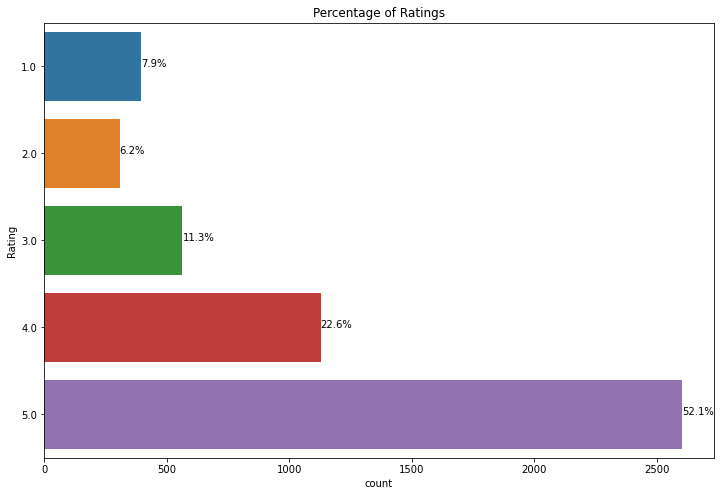

In [37]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [38]:
data = df[['Review']]
data

Review
0     All items are there in the box. but I didn't s...
1                                                 Supar
2     Battery life is good and I liked high speed ch...
3     The dislike part is that sometimes the volume ...
4                                    Good Android phone
...                                                 ...
4995  Green line on display with in few days of use ...
4996  Camara perfomance is not so good and speaker p...
4997  It's a used product......I want to return my p...
4998  Worst camera quality, it's look like a low pho...
4999  This product is not good, sound and camera is ...

[5000 rows x 1 columns]

In [39]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [40]:

data

Review
0     all items box. i swith mobile give someone gif...
1                                                 supar
2     battery life good i liked high speed charging....
3       the dislike part sometimes volume buttons work.
4                                    good android phone
...                                                 ...
4995  green line display days use ( less 10 days). y...
4996    camara perfomance good speaker performance good
4997  it's used product......i want return phone ......
4998  worst camera quality, look like low phone came...
4999  this product good, sound camera good brand nam...

[5000 rows x 1 columns]

In [41]:
lemmatizer = WordNetLemmatizer()

corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [42]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone

In [43]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [44]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [45]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [46]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [47]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [48]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [49]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [50]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [51]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [52]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [64]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  \
0  All items are there in the box. but I didn't s...   
1                                              Supar   
2  Battery life is good and I liked high speed ch...   
3  The dislike part is that sometimes the volume ...   
4                                 Good Android phone   
5  Nice mobile. Good Performance One Plus Nord Ce...   
6  Previously, I used a Samsung Galaxy A8 Plus. T...   
7  The media could not be loaded.\n              ...   
8                                 Best economy phone   
9           Camera not that good , rest all is good.   

                                    tokenized_tweets  
0  [item, box, swith, mobile, give, someone, gift...  
1                                            [supar]  
2  [battery, life, good, liked, high, speed, char...  
3   [dislike, part, sometimes, volume, button, work]  
4                             [good, android, phone]  
5  [nice, mobile, good, performance, one, plus, n...  
6  [previously, used, samsung, galaxy, plus, phon...  
7  [medium, could, loaded, build, quality, rating...  
8                             [best, economy, phone]  
9                         [camera, good, rest, good]

In [65]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [69]:
import codecs
with codecs.open("C:\\Users\\kkdk0001\Desktop\\DA\\DS\\Assignments\\Text Mining\\stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [70]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [71]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   
5  nice mobile good performance one plus nord ce ...   
6  previously used samsung galaxy plus phone nowh...   
7  medium could loaded build quality rating one l...   
8                                 best economy phone   
9                              camera good rest good   

                                   Uncleaned_Reviews  
0  All items are there in the box. but I didn't s...  
1                                              Supar  
2  Battery life is good and I liked high speed ch...  
3  The dislike part is that sometimes the volume ...  
4                                 Good Android phone  
5  Nice mobile. Good Performance One Plus Nord Ce...  
6  Previously, I used a Samsung Galaxy A8 Plus. T...  
7  The media could not be loaded.\n              ...  
8                                 Best economy phone  
9           Camera not that good , rest all is good.

In [72]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['supar'])

In [73]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [item, box, swith, mobile, give, someone, gift...
1                                              [supar]
2    [battery, life, good, liked, high, speed, char...
3     [dislike, part, sometimes, volume, button, work]
4                               [good, android, phone]
5    [nice, mobile, good, performance, one, plus, n...
6    [previously, used, samsung, galaxy, plus, phon...
7    [medium, could, loaded, build, quality, rating...
8                               [best, economy, phone]
9                           [camera, good, rest, good]
Name: Clean_Reviews, dtype: object

In [74]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [75]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0     item box swith mobil give someon gift day reco...
1                                                 supar
2     batteri life good like high speed charg far fa...
3                 dislik part sometim volum button work
4                                    good android phone
...                                                 ...
4944  green line display day use le day scroll defec...
4945            camara perfom good speaker perform good
4946  use product want return phone whenev login fb ...
4947  worst camera qualiti look like low phone camer...
4948  product good sound camera good brand name woul...

[4949 rows x 1 columns]

In [76]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...


stemmed
0     item box swith mobile give someone gift day re...
1                                                 supar
2     battery life good liked high speed charging fa...
3             dislike part sometimes volume button work
4                                    good android phone
...                                                 ...
4944  green line display day use le day scroll defec...
4945    camara perfomance good speaker performance good
4946  used product want return phone whenever login ...
4947  worst camera quality look like low phone camer...
4948  product good sound camera good brand name woul...

[4949 rows x 1 columns]

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [78]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4949 [00:00<?, ?it/s]

In [79]:
corpus[3]

'dislik part sometim volum button work'

In [80]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [81]:
cv.get_feature_names()[:20]

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'adapt cabl',
 'add',
 'add power']

In [82]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [83]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aa  aap  ab  abl  absolut  accept  access  accessori  accha  accord  \
0      0    0   0    0        0       0       0          0      0       0   
1      0    0   0    0        0       0       0          0      0       0   
2      0    0   0    0        0       0       0          0      0       0   
3      0    0   0    0        0       0       0          0      0       0   
4      0    0   0    0        0       0       0          0      0       0   
...   ..  ...  ..  ...      ...     ...     ...        ...    ...     ...   
4944   0    0   0    0        0       0       0          0      0       0   
4945   0    0   0    0        0       0       0          0      0       0   
4946   0    0   0    0        0       0       0          0      0       0   
4947   0    0   0    0        0       0       0          0      0       0   
4948   0    0   0    0        0       0       0          0      0       0   

      ...  year old  year secur  year secur updat  yellow  yesterday  yet  \
0     ...         0           0                 0       0          0    0   
1     ...         0           0                 0       0          0    0   
2     ...         0           0                 0       0          0    0   
3     ...         0           0                 0       0          0    0   
4     ...         0           0                 0       0          0    0   
...   ...       ...         ...               ...     ...        ...  ...   
4944  ...         0           0                 0       0          0    0   
4945  ...         0           0                 0       0          0    0   
4946  ...         0           0                 0       0          0    0   
4947  ...         0           0                 0       0          0    0   
4948  ...         0           0                 0       0          0    0   

      youtub  youtub video  yr  zoom  
0          0             0   0     0  
1          0             0   0     0  
2          0             0   0     0  
3          0             0   0     0  
4          0             0   0     0  
...      ...           ...  ..   ...  
4944       0             0   0     0  
4945       0             0   0     0  
4946       0             0   0     0  
4947       0             0   0     0  
4948       0             0   0     0  

[4949 rows x 5000 columns]

In [84]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4949 [00:00<?, ?it/s]

In [85]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [86]:
X.shape

(4949, 5000)

In [87]:
tfidf_v.get_feature_names()[:20]

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'adapt cabl',
 'add',
 'add power']

In [88]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [89]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aa  aap   ab  abl  absolut  accept  access  accessori  accha  accord  \
0     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
1     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
2     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
3     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
...   ...  ...  ...  ...      ...     ...     ...        ...    ...     ...   
4944  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4945  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4946  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4947  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4948  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   

      ...  year old  year secur  year secur updat  yellow  yesterday  yet  \
0     ...       0.0         0.0               0.0     0.0        0.0  0.0   
1     ...       0.0         0.0               0.0     0.0        0.0  0.0   
2     ...       0.0         0.0               0.0     0.0        0.0  0.0   
3     ...       0.0         0.0               0.0     0.0        0.0  0.0   
4     ...       0.0         0.0               0.0     0.0        0.0  0.0   
...   ...       ...         ...               ...     ...        ...  ...   
4944  ...       0.0         0.0               0.0     0.0        0.0  0.0   
4945  ...       0.0         0.0               0.0     0.0        0.0  0.0   
4946  ...       0.0         0.0               0.0     0.0        0.0  0.0   
4947  ...       0.0         0.0               0.0     0.0        0.0  0.0   
4948  ...       0.0         0.0               0.0     0.0        0.0  0.0   

      youtub  youtub video   yr  zoom  
0        0.0           0.0  0.0   0.0  
1        0.0           0.0  0.0   0.0  
2        0.0           0.0  0.0   0.0  
3        0.0           0.0  0.0   0.0  
4        0.0           0.0  0.0   0.0  
...      ...           ...  ...   ...  
4944     0.0           0.0  0.0   0.0  
4945     0.0           0.0  0.0   0.0  
4946     0.0           0.0  0.0   0.0  
4947     0.0           0.0  0.0   0.0  
4948     0.0           0.0  0.0   0.0  

[4949 rows x 5000 columns]

In [90]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'item box swith mobile give someone gift day record another video switching phone incase mobile problem upload video supar battery life good liked high speed charging far faced heating hanging problem gesture good camera feature good portrait mode could better also go fingerprint dislike part sometimes volume button work good android phone nice mobile good performance one plus nord ce letest update coming gb date mobile performance amazing previously used samsung galaxy plus phone nowhere near term display camera quality think hardware old phone really good phone lesser pixel size camera sensor therefore hard get quality shot low light photo shot pro mode camere really disappointed display okay android give nice ui vibration haptics horrible compared old phone color also facing issue opinion medium could loaded build quality rating one light weight phone say quite comfortable one hand usage even material used polycarbonate get job done matter back cover term styling similar oppo phone 

In [91]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [92]:
for token in doc_block[:50]:
    print(token,token.pos_)  

item PROPN
box PROPN
swith X
mobile PROPN
give VERB
someone PRON
gift NOUN
day NOUN
record VERB
another DET
video NOUN
switching VERB
phone NOUN
incase NOUN
mobile NOUN
problem NOUN
upload NOUN
video NOUN
supar PROPN
battery NOUN
life NOUN
good ADJ
liked VERB
high ADJ
speed NOUN
charging VERB
far ADV
faced VERB
heating NOUN
hanging VERB
problem NOUN
gesture VERB
good ADJ
camera NOUN
feature NOUN
good ADJ
portrait NOUN
mode NOUN
could AUX
better ADV
also ADV
go VERB
fingerprint NOUN
dislike NOUN
part NOUN
sometimes ADV
volume VERB
button NOUN
work NOUN
good ADV


In [93]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['rate', 'work', 'wish', 'chin', 'thing', 'gorilla', 'glass', 'protection', 'screen', 'applied', 'panel', 'wellperformance', 'rating', 'dimensity', 'get', 'job', 'done', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'expect', 'cod', 'say', 'processor', 'competition', 'offering', 'decide', 'gaming', 'matter', 'year', 'usagesoftware', 'con', 'android', 'based', 'oxygen', 'say', 'color', 'oos', 'bug', 'say', 'lot', 'wait', 'android', 'ideacamera', 'rating', 'mp', 'atleast', 'expecting', 'sensor', 'provided', 'omnivison', 'sensor', 'get', 'job', 'done', 'camera', 'check', 'review', 'video', 'stability', 'p', 'mp', 'ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'network', 'rest', 'remaining', 'wifi', 'battery', 'task', 'day', 'charging', 'take', 'charge', 'percent', 'fastspeakers', 'speaker', 'quality', 'g']


In [94]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0     phone   1983
1    camera   1358
2   battery    996
3   quality    820
4   product    412
5  charging    373
6     price    359
7       day    330
8   oneplus    307
9      life    303

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

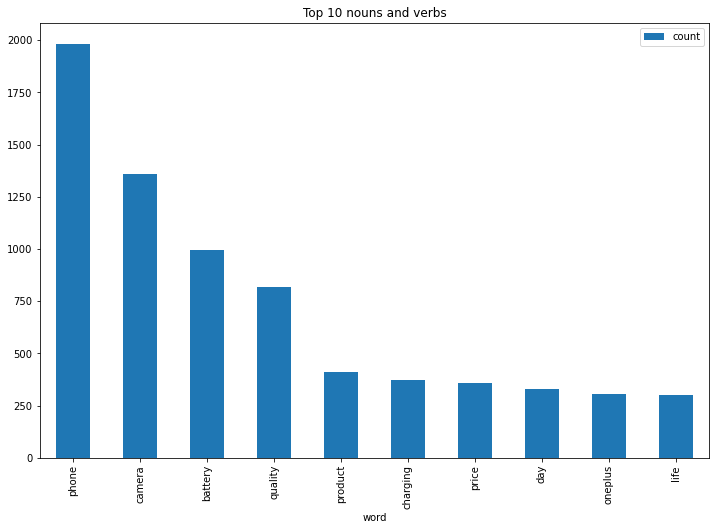

In [95]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [96]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [97]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [98]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos           4377
neg            572

In [103]:

dataframe.Clean_Reviews[8]

'best economy phone'

In [100]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [106]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   

                                              scores  
0  {'neg': 0.125, 'neu': 0.741, 'pos': 0.134, 'co...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.077, 'neu': 0.513, 'pos': 0.41, 'com...  
3  {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...  
4  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...

In [107]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   

                                              scores  compound  
0  {'neg': 0.125, 'neu': 0.741, 'pos': 0.134, 'co...    0.0516  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2  {'neg': 0.077, 'neu': 0.513, 'pos': 0.41, 'com...    0.8934  
3  {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...   -0.3818  
4  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...    0.4404

In [108]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     item box swith mobile give someone gift day re...   
1                                                 supar   
2     battery life good liked high speed charging fa...   
3             dislike part sometimes volume button work   
4                                    good android phone   
...                                                 ...   
4944  green line display day use le day scroll defec...   
4945    camara perfomance good speaker performance good   
4946  used product want return phone whenever login ...   
4947  worst camera quality look like low phone camer...   
4948  product good sound camera good brand name woul...   

                                                 scores  compound sentiment  
0     {'neg': 0.125, 'neu': 0.741, 'pos': 0.134, 'co...    0.0516  Positive  
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
2     {'neg': 0.077, 'neu': 0.513, 'pos': 0.41, 'com...    0.8934  Positive  
3     {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...   -0.3818  Negative  
4     {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...    0.4404  Positive  
...                                                 ...       ...       ...  
4944  {'neg': 0.292, 'neu': 0.575, 'pos': 0.133, 'co...   -0.6808  Negative  
4945  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...    0.7003  Positive  
4946  {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...    0.0772  Positive  
4947  {'neg': 0.345, 'neu': 0.474, 'pos': 0.181, 'co...   -0.7845  Negative  
4948  {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...    0.7003  Positive  

[4949 rows x 4 columns]

In [109]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\Users\kkdk0001\Anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [114]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

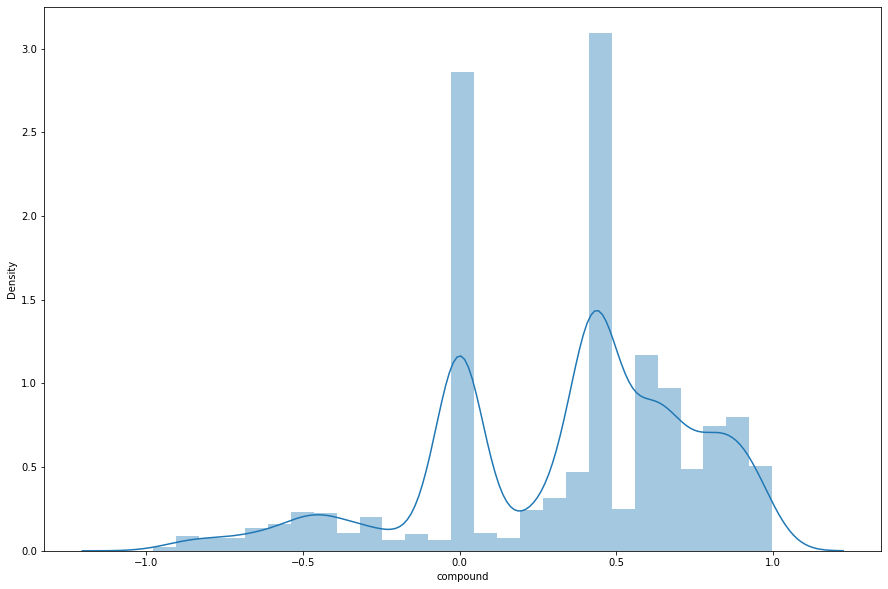

In [116]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [118]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

Review  word_count
0  item box swith mobile give someone gift day re...          18
1                                              supar           1
2  battery life good liked high speed charging fa...          24
3          dislike part sometimes volume button work           6
4                                 good android phone           3

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

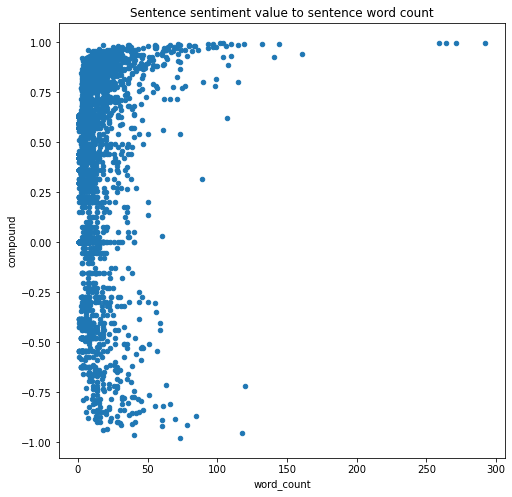

In [119]:
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [120]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           4485
neg            464

In [122]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  All items are there in the box. but I didn't s...      0.000000  0.000000  
1                                              Supar      0.000000  0.000000  
2  Battery life is good and I liked high speed ch...      0.662857  0.494286  
3  The dislike part is that sometimes the volume ...      0.000000  0.000000  
4                                 Good Android phone      0.600000  0.700000

Text(0, 0.5, 'Subjectivity')

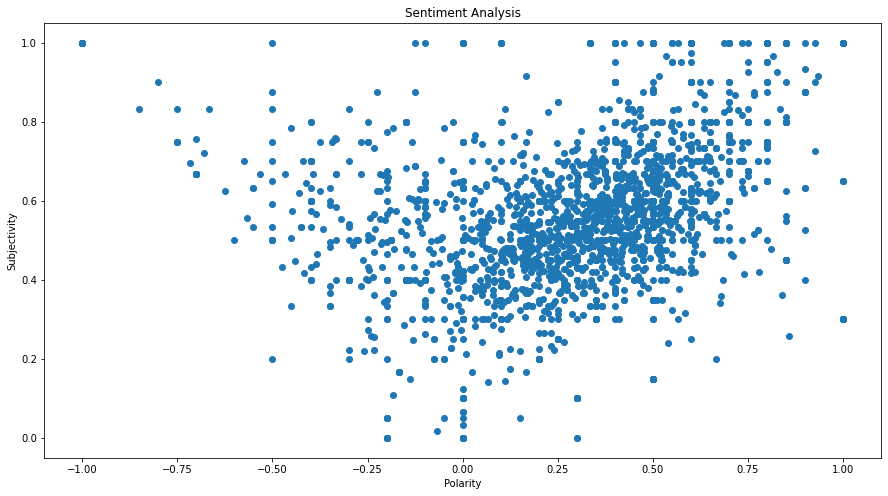

In [123]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [126]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [130]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text Mining\\clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  item box swith mobile give someone gift day re...   
1                                              supar   
2  battery life good liked high speed charging fa...   
3          dislike part sometimes volume button work   
4                                 good android phone   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  All items are there in the box. but I didn't s...      0.000000  0.000000   
1                                              Supar      0.000000  0.000000   
2  Battery life is good and I liked high speed ch...      0.662857  0.494286   
3  The dislike part is that sometimes the volume ...      0.000000  0.000000   
4                                 Good Android phone      0.600000  0.700000   

  sentiment  
0       pos  
1       pos  
2       pos  
3       neg  
4       pos

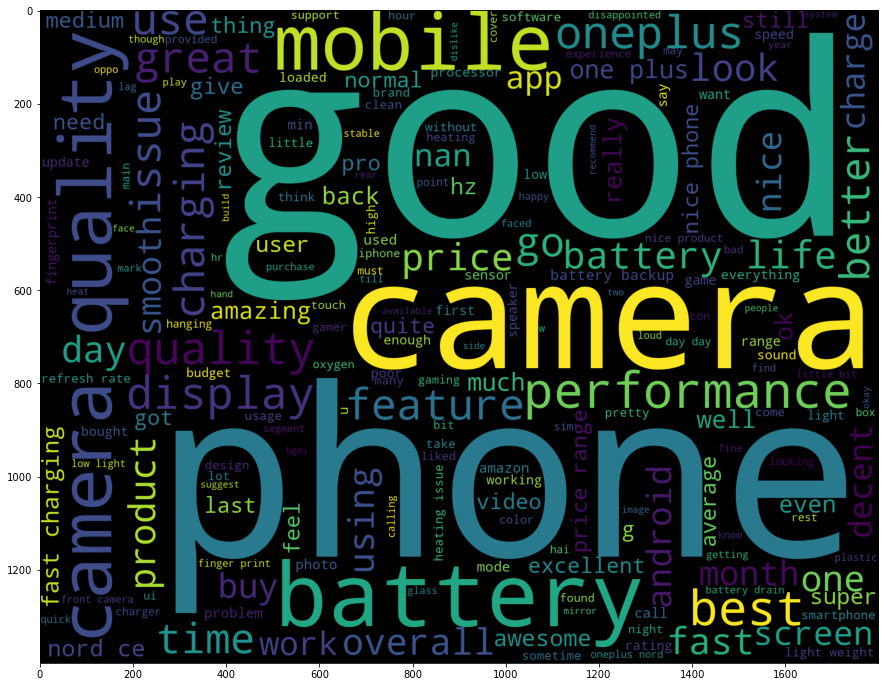

In [132]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [134]:
# Most common words in positive Review

In [135]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    

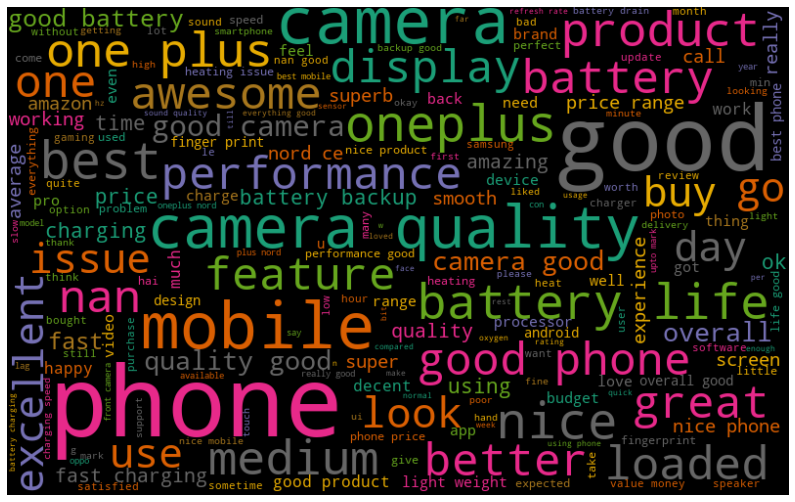

In [136]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

In [137]:
# Most common words in negative Review

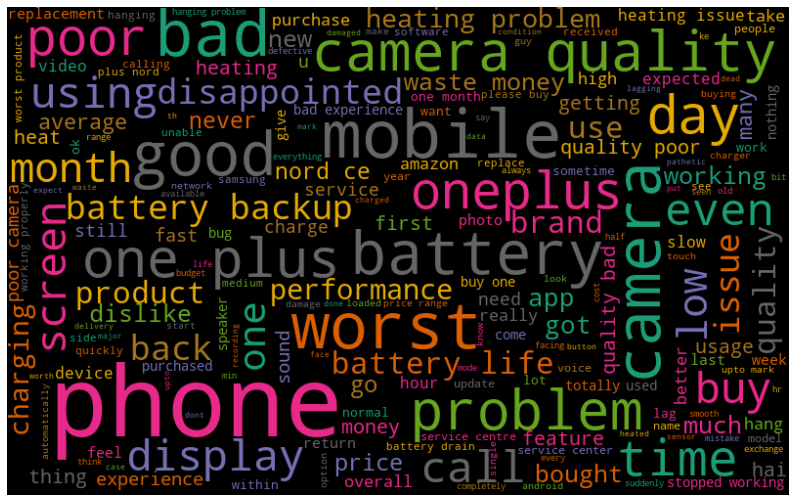

In [138]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)